In [1]:
pip install line_profiler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext line_profiler

In [3]:
from skimage import data, color
from skimage.transform import resize
from PIL import Image

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
import os
import time

In [5]:
imgs = np.uint8(data.lfw_subset()*255)

In [6]:
def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)

In [10]:
%lprun -f res_skimage res_skimage(imgs)

In [11]:
def res_PILimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        new_im = Image.fromarray(im)  
        new_im = np.asarray(new_im.resize(new_size))
        res_im.append(new_im)
    return np.asarray(res_im)

In [12]:
%lprun -f res_PILimage res_PILimage(imgs)

In [56]:
def original_img(o1,re1,re2):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.imshow(o1[0],cmap = 'gray')
    ax1.set_title('Original')

    ax2.set_title('Resized Skimage')
    ax2.imshow(re1[0],cmap = 'gray')
    ax3.set_title('Resized PILimage')
    ax3.imshow(re1[0],cmap = 'gray')
    plt.show()

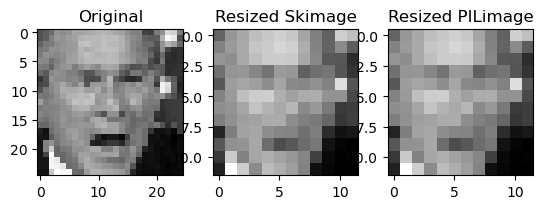

In [57]:
re1 = res_skimage(imgs)
re2 = res_skimage1(imgs)
original_img(imgs,re1,re2)

In [7]:
import threading
import multiprocessing

In [8]:
def approximate_pi(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2 
    return 2*pi_2

In [9]:
nums = [1822725,
        22059421,
        32374695,
        88754320,
        9716266]

In [10]:
##Task 2
# multithreading

%%timeit

threads = []
for i in nums:
    thread = threading.Thread(target = approximate_pi,args = (i,))
    thread.start()
    threads.append(thread)
for thread in threads:
    thread.join()
    

13.8 s ± 151 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
# multiprocessing

%%timeit

processes = []
for i in nums:
    process = multiprocessing.Process(target = approximate_pi,args = (i,))
    process.start()
    processes.append(process)
for process in processes:
    process.join()
    

71.1 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
def load_array(filename):
    return np.load(filename)

In [25]:
filename = []
for i in range(0,10):
    file_name = 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_{number}.npy'.format(number = i)
    filename.append(file_name)
filename

['D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_0.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_1.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_2.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_3.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_4.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_5.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_6.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_7.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_8.npy',
 'D:/Fau/2WS/DSSS/home work/homework_10/numpy_files/numpy_file_9.npy']

In [30]:
##Task 3
# multithreading

%%timeit

threads = []
for i in filename:
    thread = threading.Thread(target = load_array,args = (i,))
    thread.start()
    threads.append(thread)
for thread in threads:
    thread.join()


713 ms ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
# multiprocessing

%%timeit

processes = []
for i in filename:
    process = multiprocessing.Process(target = load_array,args = (i,))
    process.start()
    processes.append(process)
for process in processes:
    process.join()
    

111 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
